In [2]:
from skimage import io
import numpy as np
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#function for replace the specific colour with other color
def replaceColorFromImg(img, specificColor, replaceColor ):
    temp = img
    temp = temp.convert("RGBA")
    data = np.array(temp)
    red, green, blue, alpha = data.T
    white_areas = (red == specificColor[0]) & (green == specificColor[1])& (blue == specificColor[2]) 
    data[..., :-1][white_areas.T] = (replaceColor[0], replaceColor[1], replaceColor[2])
    im2 = Image.fromarray(data)
    plt.imshow(im2)

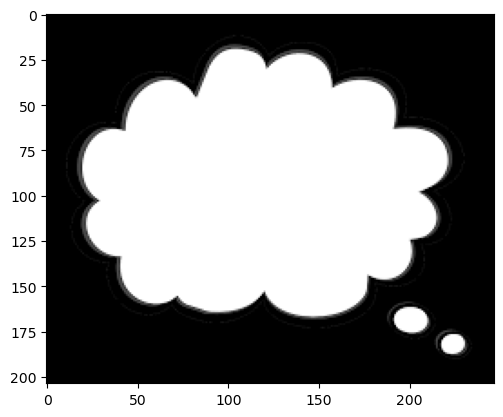

In [5]:
img = Image.open("E:\ML_test\Data\index.png")
img = img.convert("RGB")
plt.imshow(img)

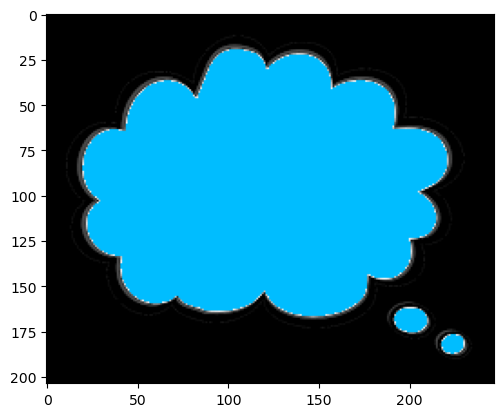

In [6]:
#want to remove color
sc = [255,255,255] #white
#want to place color
rc = [0,189,255] #light blue

replaceColorFromImg(img, sc, rc)

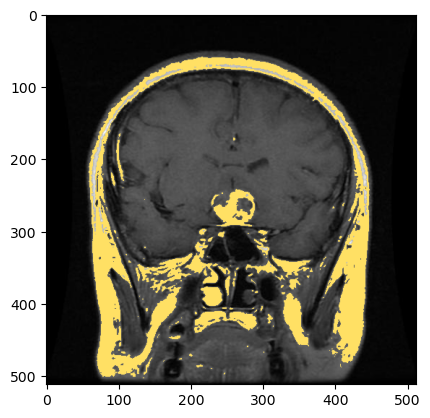

In [3]:
img = Image.open("E:\ML_test\Data\zipped\Copy of Tr-pi_0010.jpg")
img = img.convert("RGB")

d = img.getdata()

new_image = []
for item in d:
# change all white (also shades of whites)
# pixels to yellow
    if item[0] in list(range(100, 179)):
        new_image.append((255, 224, 100))
    else:
        new_image.append(item)

# update image data
img.putdata(new_image)
# save new image
plt.imshow(img)

I try to extract the brain using threshold

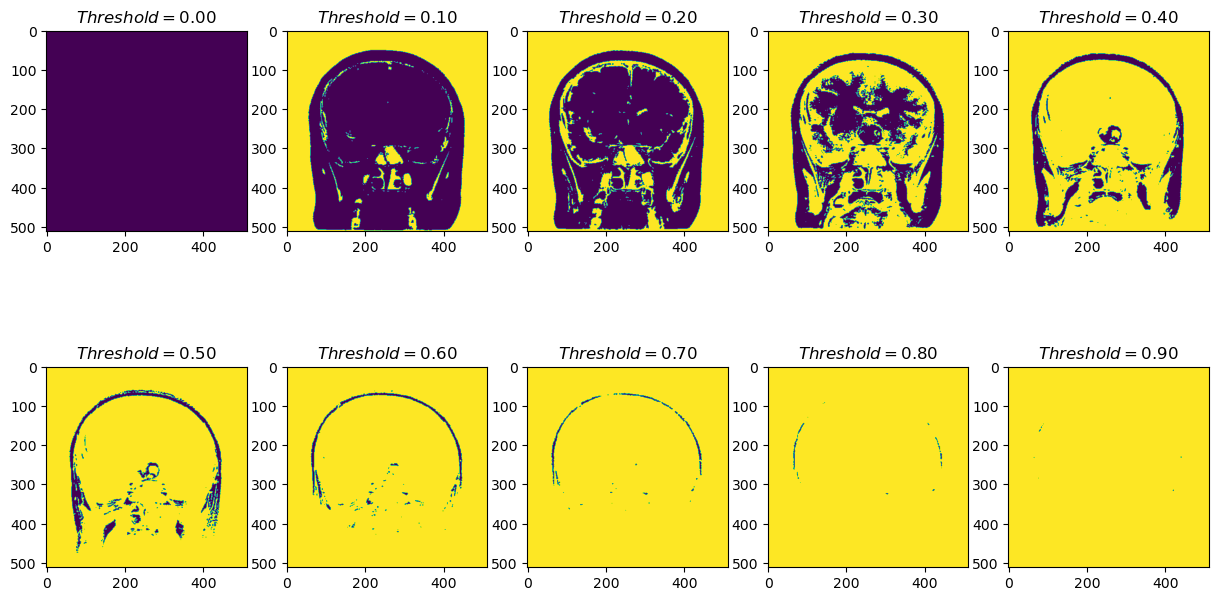

In [4]:
skull = io.imread("E:\ML_test\Data\zipped\Copy of Tr-pi_0010.jpg")
skull_gray = rgb2gray(skull)

th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))

for th, ax in zip(th_values, axis.flatten()):
    sk_binarized = skull_gray < th
    ax.imshow(sk_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

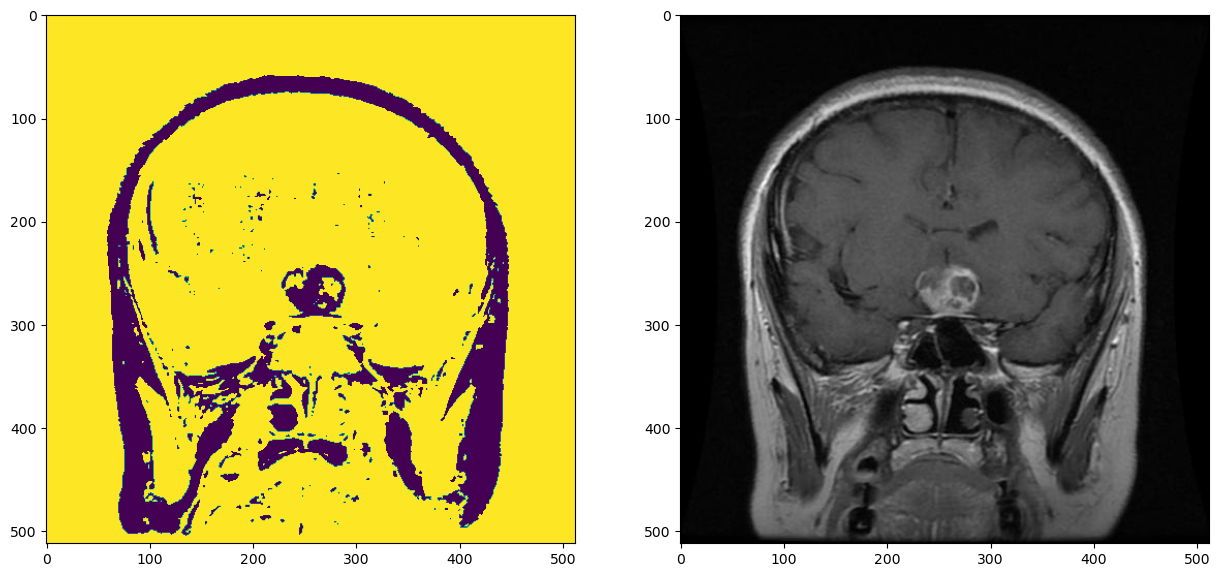

In [13]:
#0.30 to 0.35
temp_skull = io.imread("E:\ML_test\Data\zipped\Copy of Tr-pi_0010.jpg")
temp_skull_gray = rgb2gray(temp_skull)
temp_binarized = temp_skull_gray < 0.36
fig, axis = plt.subplots(1, 2, figsize=(15,8))
axis[0].imshow(temp_binarized)
axis[1].imshow(temp_skull)

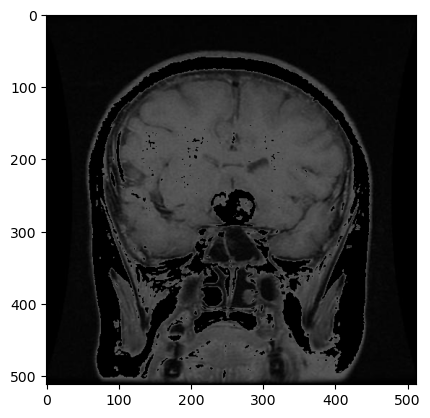

In [14]:
temp_skull[temp_skull_gray > 0.36] = [0,0,0]
plt.imshow(temp_skull)